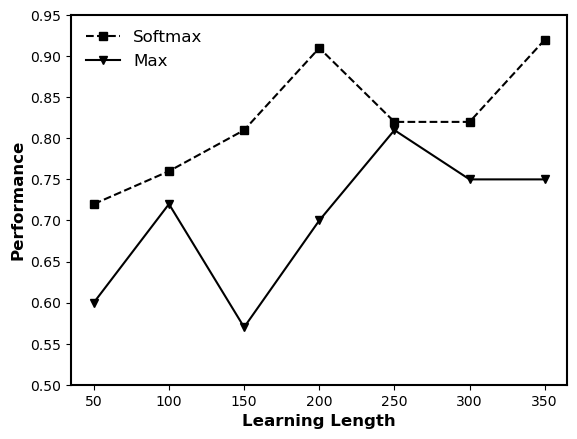

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from Q_learning import Agent

legend_properties = {'weight':'bold'}
repetitions = 100 # should be 2000 as per (Fang, 2009)
learning_episodes = [50, 100, 150, 200, 250, 300, 350]

softmax_performance_across_episodes = []
evaluation_tau = 20
for episode in learning_episodes:
    softmax_performance_across_agents = []
    for _ in range(repetitions):
        q_agent = Agent(N=10, high_peak=50, low_peak=10)
        for index in range(episode):
            q_agent.learn(tau=20, alpha=0.2, gamma=0.9)
        q_agent.evaluate(tau=evaluation_tau)
        softmax_performance_across_agents.append(q_agent.performance)
    performance = sum([1 if reward == 50 else 0 for reward in softmax_performance_across_agents]) / len(softmax_performance_across_agents)
    softmax_performance_across_episodes.append(performance)

max_performance_across_episodes = []
evaluation_tau = 0.1
for episode in learning_episodes:
    max_performance_across_agents = []
    for _ in range(repetitions):
        q_agent = Agent(N=10, high_peak=50, low_peak=10)
        for index in range(episode):
            q_agent.learn(tau=20, alpha=0.2, gamma=0.9)
        q_agent.evaluate(tau=evaluation_tau)
        max_performance_across_agents.append(q_agent.performance)
    performance = sum([1 if reward == 50 else 0 for reward in max_performance_across_agents]) / len(max_performance_across_agents)
    max_performance_across_episodes.append(performance)

# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_performance_across_episodes, "k--s", label="Softmax")
plt.plot(x, max_performance_across_episodes, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
ax.set_ylim(0.50, 0.95)
ax.set_yticks(np.arange(0.50, 0.96, 0.05))
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Softmax_Max_Performance.png", transparent=True, dpi=300)
plt.show()
plt.clf()
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

In [5]:
# Test whether the maximization works
import matplotlib.pyplot as plt
import numpy as np
from Q_learning import Agent

legend_properties = {'weight':'bold'}
repetitions = 100 # should be 2000 as per (Fang, 2009)

max_performance_across_episodes = []
evaluation_tau = 0.1
max_performance_across_agents = []
steps_across_agents = []
for _ in range(repetitions):
    q_agent = Agent(N=10, high_peak=50, low_peak=10)
    for index in range(350):
        q_agent.learn(tau=20, alpha=0.2, gamma=0.9)
    q_agent.evaluate(tau=evaluation_tau)
    max_performance_across_agents.append(q_agent.performance)
    steps_across_agents.append(q_agent.steps)
performance = sum([1 if reward == 50 else 0 for reward in max_performance_across_agents]) / len(max_performance_across_agents)
steps = sum(steps_across_agents) / len(steps_across_agents)
print("Maximization", performance, steps)

Maximization 0.72 6.98


In [6]:
# Test whether the maximization works
import matplotlib.pyplot as plt
import numpy as np
from Q_learning import Agent

legend_properties = {'weight':'bold'}
repetitions = 100 # should be 2000 as per (Fang, 2009)

evaluation_tau = 20
softmax_performance_across_agents = []
steps_across_agents = []
for _ in range(repetitions):
    q_agent = Agent(N=10, high_peak=50, low_peak=10)
    for index in range(350):
        q_agent.learn(tau=20, alpha=0.2, gamma=0.9)
    q_agent.evaluate(tau=evaluation_tau)
    softmax_performance_across_agents.append(q_agent.performance)
    steps_across_agents.append(q_agent.steps)
performance = sum([1 if reward == 50 else 0 for reward in softmax_performance_across_agents]) / len(softmax_performance_across_agents)
steps = sum(steps_across_agents) / len(steps_across_agents)
print("Softmax", performance, steps)

Softmax 0.92 134.93
